In [2]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\111897


In [3]:
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)#展開所有欄位
pd.set_option('display.max_rows', None)#展開所有欄位

In [8]:
cnxn = pyodbc.connect(driver='{SQL Server}', server='10.11.48.12', database='FZSRD_BD',               
               trusted_connection='yes')

sql = "SELECT * FROM v_henry_A_投資理財"

data=pd.read_sql(sql, cnxn)

print(data.columns)

cnxn.close()

Index(['label', 'Target_Y', 'SEX', 'RAND_ID', 'UNINO', 'ID_NBR', 'ID_ERR',
       'BUS', 'BIRTH', 'EDU', 'F_EXPIRY', 'HOME_ZIP', 'INCOME', 'OWNERSHIP',
       'OCC', 'MARR', 'COMP_NAME', 'STMT_ZIP', 'L_MAINT_DT', 'COMP_ZIP',
       'MAIL_IND', 'PERM_ZIP', 'SYS_DATE', '性別', 'age', '年齡級距', '員工記號', '行業別',
       '行業別_分類', 'bus_edesc', 'OWNER_DESC', '現居地所有權', '教育程度', '現居地_區域',
       'home_dist', '現居地_縣市', 'home_city', '現居地_縣市_英', '年收入', 'Salary',
       'OCC_DESC', '職稱別', 'GRP_DESC', '職稱別_分類', '姻婚狀態', 'marry_status', '公司名稱',
       '資料更新日', '戶籍_區域', 'perm_dist', '戶籍_縣市', 'perm_city', '公司_區域',
       'comp_dist', '公司_縣市', 'comp_city', '星座', '星座_E', '存戶最早開戶日',
       '台外幣總存款餘額_等值台幣', '台幣總存款餘額', '外幣總存款餘額_等值台幣', '台幣定存總存款餘額', 'MMA網銀會員',
       'MMA網路服務記號', '曾登入行動銀行', 'JCIC記號', 'JCIC_無擔保貸款金額_千元',
       'JCIC_無擔保貸款金額_千元_他行', 'JCIC_信用卡_最近分期餘額', 'JCIC_信用卡_最近分期餘額_他行',
       'JCIC_信用卡_最近分期銀行數', 'JCIC_中期貸款餘額', 'JCIC_長期貸款餘額', 'JCIC_授信異常記號',
       'JCIC_近半年增債金額_千元', 'JCIC_他行卡片最高等級', 'JCIC_他行近一年年收入均值

In [ ]:
cnxn = pyodbc.connect(driver='{SQL Server}', server='10.11.48.12', database='FZSRD_BD',               
               trusted_connection='yes')

sqlr = "SELECT * FROM v_henry_A_投資理財 where 季投資理財AP_2020Q2>0"


datar=pd.read_sql(sqlr, cnxn)

print(datar.columns)

cnxn.close()

In [ ]:
cnxn = pyodbc.connect(driver='{SQL Server}', server='10.11.48.12', database='FZSRD_BD',               
               trusted_connection='yes')

sqld = "SELECT * FROM v_henry_A_投資理財"


datad=pd.read_sql(sqld, cnxn)

print(datad.columns)

cnxn.close()

In [9]:
ap_data = data[["性別","SEX","age","年齡級距","行業別_分類","現居地_縣市","戶籍_縣市","Salary","教育程度","姻婚狀態","星座","星座_E","MMA網銀會員","曾登入行動銀行","台幣總存款餘額","外幣總存款餘額_等值台幣","MMA網路服務記號","JCIC_無擔保貸款金額_千元","JCIC_無擔保貸款金額_千元_他行","JCIC_信用卡_最近分期餘額","JCIC_信用卡_最近分期餘額_他行","JCIC_信用卡_最近分期銀行數","JCIC_中期貸款餘額","JCIC_長期貸款餘額","JCIC_他行近一年年收入均值","季投資理財AP_2020Q2","Target_Y","label"]]

ap_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112189 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   性別                  112189 non-null  object 
 1   SEX                 112189 non-null  object 
 2   age                 112007 non-null  float64
 3   年齡級距                112189 non-null  object 
 4   行業別_分類              94640 non-null   object 
 5   現居地_縣市              111879 non-null  object 
 6   戶籍_縣市               111880 non-null  object 
 7   Salary              112189 non-null  float64
 8   教育程度                111438 non-null  object 
 9   姻婚狀態                112174 non-null  object 
 10  星座                  112188 non-null  object 
 11  星座_E                112188 non-null  object 
 12  MMA網銀會員             112189 non-null  object 
 13  曾登入行動銀行             112189 non-null  object 
 14  台幣總存款餘額             112189 non-null  float64
 15  外幣總存款餘額_等值台幣        112189 non-nul

In [11]:
ap_data = ap_data.dropna()
ap_data.head(5)
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93855 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   性別                  93855 non-null  object 
 1   SEX                 93855 non-null  object 
 2   age                 93855 non-null  float64
 3   年齡級距                93855 non-null  object 
 4   行業別_分類              93855 non-null  object 
 5   現居地_縣市              93855 non-null  object 
 6   戶籍_縣市               93855 non-null  object 
 7   Salary              93855 non-null  float64
 8   教育程度                93855 non-null  object 
 9   姻婚狀態                93855 non-null  object 
 10  星座                  93855 non-null  object 
 11  星座_E                93855 non-null  object 
 12  MMA網銀會員             93855 non-null  object 
 13  曾登入行動銀行             93855 non-null  object 
 14  台幣總存款餘額             93855 non-null  float64
 15  外幣總存款餘額_等值台幣        93855 non-null  float64
 16  MMA

In [12]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93855 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   性別                  93855 non-null  object 
 1   SEX                 93855 non-null  object 
 2   age                 93855 non-null  float64
 3   年齡級距                93855 non-null  object 
 4   行業別_分類              93855 non-null  object 
 5   現居地_縣市              93855 non-null  object 
 6   戶籍_縣市               93855 non-null  object 
 7   Salary              93855 non-null  float64
 8   教育程度                93855 non-null  object 
 9   姻婚狀態                93855 non-null  object 
 10  星座                  93855 non-null  object 
 11  星座_E                93855 non-null  object 
 12  MMA網銀會員             93855 non-null  object 
 13  曾登入行動銀行             93855 non-null  object 
 14  台幣總存款餘額             93855 non-null  float64
 15  外幣總存款餘額_等值台幣        93855 non-null  float64
 16  MMA

In [10]:
ap_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,42426.0,48.461674,12.363491,5.00000,40.00000,48.000000,57.000000,9.700000e+01
Salary,42426.0,110.535730,123.152258,0.00000,27.30000,60.000000,133.000000,9.999000e+02
台幣總存款餘額,42426.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000e+00
外幣總存款餘額_等值台幣,42426.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000e+00
JCIC_無擔保貸款金額_千元,42426.0,145.677863,1981.589973,0.00000,0.00000,0.000000,20.000000,3.150000e+05
JCIC_無擔保貸款金額_千元_他行,42426.0,118.327299,1926.081816,0.00000,0.00000,0.000000,11.000000,3.150000e+05
JCIC_信用卡_最近分期餘額,42426.0,24.763023,353.032585,0.00000,0.00000,0.000000,9.000000,5.688800e+04
JCIC_信用卡_最近分期餘額_他行,42426.0,17.851648,204.240698,0.00000,0.00000,0.000000,4.000000,3.713100e+04
JCIC_信用卡_最近分期銀行數,42426.0,0.609296,1.091367,0.00000,0.00000,0.000000,1.000000,1.700000e+01
JCIC_中期貸款餘額,42426.0,215.874534,6771.648188,0.00000,0.00000,0.000000,0.000000,8.498000e+05


In [13]:
Q1 = ap_data.quantile(0.25)
Q3 = ap_data.quantile(0.75)
IQR = Q3 - Q1

a = Q1
print("{0} \n".format(a))

a = Q3
print("{0} \n".format(a))

a = IQR
print("{0} \n".format(a))


age                   37.0
Salary                28.6
台幣總存款餘額                0.0
外幣總存款餘額_等值台幣           0.0
JCIC_無擔保貸款金額_千元        0.0
JCIC_無擔保貸款金額_千元_他行     0.0
JCIC_信用卡_最近分期餘額        0.0
JCIC_信用卡_最近分期餘額_他行     0.0
JCIC_信用卡_最近分期銀行數       0.0
JCIC_中期貸款餘額            0.0
JCIC_長期貸款餘額            0.0
JCIC_他行近一年年收入均值        0.0
季投資理財AP_2020Q2         0.0
Target_Y               0.0
Name: 0.25, dtype: float64 

age                    55.000000
Salary                100.000000
台幣總存款餘額                 0.000000
外幣總存款餘額_等值台幣            0.000000
JCIC_無擔保貸款金額_千元        36.000000
JCIC_無擔保貸款金額_千元_他行     24.000000
JCIC_信用卡_最近分期餘額        10.000000
JCIC_信用卡_最近分期餘額_他行      6.000000
JCIC_信用卡_最近分期銀行數        1.000000
JCIC_中期貸款餘額             0.000000
JCIC_長期貸款餘額           122.500000
JCIC_他行近一年年收入均值       755.000000
季投資理財AP_2020Q2        380.545477
Target_Y                1.000000
Name: 0.75, dtype: float64 

age                    18.000000
Salary                 71.400000
台幣總存款餘額                 0.000000
外幣總

In [14]:
ap_data = ap_data[(ap_data["Salary"]>=Q1["Salary"]-IQR["Salary"]*1.5) & (ap_data["Salary"]<=Q3["Salary"]+IQR["Salary"]*1.5)]
ap_data = ap_data[(ap_data["台幣總存款餘額"]>=Q1["台幣總存款餘額"]-IQR["台幣總存款餘額"]*1.5) & (ap_data["台幣總存款餘額"]<=Q3["台幣總存款餘額"]+IQR["台幣總存款餘額"]*1.5)]
ap_data = ap_data[(ap_data["JCIC_他行近一年年收入均值"]>=Q1["JCIC_他行近一年年收入均值"]-IQR["JCIC_他行近一年年收入均值"]*1.5) & (ap_data["JCIC_他行近一年年收入均值"]<=Q3["JCIC_他行近一年年收入均值"]+IQR["JCIC_他行近一年年收入均值"]*1.5)]
#JCIC_長期貸款餘額
#JCIC_中期貸款餘額
ap_data = ap_data[(ap_data["季投資理財AP_2020Q2"]>=Q1["季投資理財AP_2020Q2"]-IQR["季投資理財AP_2020Q2"]*1.5) & (ap_data["季投資理財AP_2020Q2"]<=Q3["季投資理財AP_2020Q2"]+IQR["季投資理財AP_2020Q2"]*1.5)]

In [15]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69545 entries, 0 to 112188
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   性別                  69545 non-null  object 
 1   SEX                 69545 non-null  object 
 2   age                 69545 non-null  float64
 3   年齡級距                69545 non-null  object 
 4   行業別_分類              69545 non-null  object 
 5   現居地_縣市              69545 non-null  object 
 6   戶籍_縣市               69545 non-null  object 
 7   Salary              69545 non-null  float64
 8   教育程度                69545 non-null  object 
 9   姻婚狀態                69545 non-null  object 
 10  星座                  69545 non-null  object 
 11  星座_E                69545 non-null  object 
 12  MMA網銀會員             69545 non-null  object 
 13  曾登入行動銀行             69545 non-null  object 
 14  台幣總存款餘額             69545 non-null  float64
 15  外幣總存款餘額_等值台幣        69545 non-null  float64
 16  MMA

In [17]:
ap_data["label"].value_counts(ascending=True)


Y    23224
N    46321
Name: label, dtype: int64

In [17]:
#用tableau 檢查為何AP都是0
ap_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27288.0,46.235415,12.039066,5.00000,38.000000,46.000000,54.000000,96.000000
Salary,27288.0,55.778518,36.736995,0.00000,25.000000,46.500000,75.000000,186.500000
台幣總存款餘額,27288.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
外幣總存款餘額_等值台幣,27288.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
JCIC_無擔保貸款金額_千元,27288.0,105.096489,520.439102,0.00000,0.000000,0.000000,25.000000,38200.000000
JCIC_無擔保貸款金額_千元_他行,27288.0,89.679310,502.879953,0.00000,0.000000,0.000000,15.000000,38200.000000
JCIC_信用卡_最近分期餘額,27288.0,16.872325,63.605267,0.00000,0.000000,0.000000,11.000000,4619.000000
JCIC_信用卡_最近分期餘額_他行,27288.0,13.717532,59.953885,0.00000,0.000000,0.000000,6.000000,4619.000000
JCIC_信用卡_最近分期銀行數,27288.0,0.650139,1.109349,0.00000,0.000000,0.000000,1.000000,13.000000
JCIC_中期貸款餘額,27288.0,69.787452,1271.448501,0.00000,0.000000,0.000000,0.000000,164800.000000


In [18]:
ap_data.head(5)

,性別,SEX,age,年齡級距,行業別_分類,現居地_縣市,戶籍_縣市,Salary,教育程度,姻婚狀態,星座,星座_E,MMA網銀會員,曾登入行動銀行,台幣總存款餘額,外幣總存款餘額_等值台幣,MMA網路服務記號,JCIC_無擔保貸款金額_千元,JCIC_無擔保貸款金額_千元_他行,JCIC_信用卡_最近分期餘額,JCIC_信用卡_最近分期餘額_他行,JCIC_信用卡_最近分期銀行數,JCIC_中期貸款餘額,JCIC_長期貸款餘額,JCIC_他行近一年年收入均值,季投資理財AP_2020Q2,Target_Y,label
0,女,F,41,f.40~44,服務業,新北市,新北市,55.0,4大學,其他,處女座,08_Virgo,N,Y,0.0,0.0,1,294,285,148.0,139.0,3.0,100.0,0.0,390.0,13.040896,1,Y
1,女,F,42,f.40~44,製造業,台中市,台中市,36.0,大學,未婚,天蝎座,10_Scorpio,N,Y,0.0,0.0,3,180,128,3.0,3.0,1.0,0.0,0.0,477.0,0.065629,1,Y
3,女,F,38,e.35~39,軍政機關,台北市,台北市,50.0,高中高職,未婚,天秤座,09_Libra,N,N,0.0,0.0,3,82,82,82.0,82.0,2.0,477.0,0.0,659.0,2.802284,1,Y
4,女,F,42,f.40~44,金融業,台中市,彰化縣,48.1,4大學,未婚,處女座,08_Virgo,N,Y,0.0,0.0,3,490,22,22.0,22.0,1.0,0.0,0.0,411.0,179.331062,1,Y
5,女,F,42,f.40~44,商業,新北市,台北市,69.7,大學,已婚,牡羊座,03_Aries,N,Y,0.0,0.0,1,6,6,6.0,6.0,1.0,0.0,0.0,643.0,526.550692,1,Y


In [18]:
ap_data.iloc[:3,:-2]

,性別,SEX,age,年齡級距,行業別_分類,現居地_縣市,戶籍_縣市,Salary,教育程度,姻婚狀態,星座,星座_E,MMA網銀會員,曾登入行動銀行,台幣總存款餘額,外幣總存款餘額_等值台幣,MMA網路服務記號,JCIC_無擔保貸款金額_千元,JCIC_無擔保貸款金額_千元_他行,JCIC_信用卡_最近分期餘額,JCIC_信用卡_最近分期餘額_他行,JCIC_信用卡_最近分期銀行數,JCIC_中期貸款餘額,JCIC_長期貸款餘額,JCIC_他行近一年年收入均值,季投資理財AP_2020Q2
0,女,F,41.0,f.40~44,服務業,新北市,新北市,55.0,4大學,其他,處女座,08_Virgo,N,Y,0.0,0.0,1,294,285,148.0,139.0,3.0,100.0,0.0,390.0,13.040896
1,女,F,42.0,f.40~44,製造業,台中市,台中市,36.0,大學,未婚,天蝎座,10_Scorpio,N,Y,0.0,0.0,3,180,128,3.0,3.0,1.0,0.0,0.0,477.0,0.065629
3,女,F,38.0,e.35~39,軍政機關,台北市,台北市,50.0,高中高職,未婚,天秤座,09_Libra,N,N,0.0,0.0,3,82,82,82.0,82.0,2.0,477.0,0.0,659.0,2.802284


In [19]:
ap_data_dummy = pd.get_dummies(ap_data, columns=['SEX','年齡級距','行業別_分類','現居地_縣市','教育程度','姻婚狀態','星座_E','MMA網銀會員','曾登入行動銀行'])
ap_data_dummy.head(5)

,性別,age,戶籍_縣市,Salary,星座,台幣總存款餘額,外幣總存款餘額_等值台幣,MMA網路服務記號,JCIC_無擔保貸款金額_千元,JCIC_無擔保貸款金額_千元_他行,JCIC_信用卡_最近分期餘額,JCIC_信用卡_最近分期餘額_他行,JCIC_信用卡_最近分期銀行數,JCIC_中期貸款餘額,JCIC_長期貸款餘額,JCIC_他行近一年年收入均值,季投資理財AP_2020Q2,Target_Y,label,SEX_F,SEX_M,年齡級距_a.~19,年齡級距_b.20~24,年齡級距_c.25~29,年齡級距_d.30~34,年齡級距_e.35~39,年齡級距_f.40~44,年齡級距_g.45~49,年齡級距_h.50~54,年齡級距_i.55~59,年齡級距_j.60~,行業別_分類_公營事業,行業別_分類_其他,行業別_分類_商業,行業別_分類_專業人士,行業別_分類_教育文化業,行業別_分類_服務業,行業別_分類_營造業,行業別_分類_製造業,行業別_分類_軍政機關,行業別_分類_農漁牧礦,行業別_分類_金融業,現居地_縣市_南投縣,現居地_縣市_台中市,現居地_縣市_台北市,現居地_縣市_台南市,現居地_縣市_台東縣,現居地_縣市_嘉義市,現居地_縣市_嘉義縣,現居地_縣市_基隆市,現居地_縣市_宜蘭縣,現居地_縣市_屏東縣,現居地_縣市_彰化縣,現居地_縣市_新北市,現居地_縣市_新竹市,現居地_縣市_新竹縣,現居地_縣市_桃園市,現居地_縣市_澎湖縣,現居地_縣市_花蓮縣,現居地_縣市_苗栗縣,現居地_縣市_連江縣,現居地_縣市_金門縣,現居地_縣市_雲林縣,現居地_縣市_高雄市,教育程度_1國中,教育程度_2高中,教育程度_3專科,教育程度_4大學,教育程度_5碩士,教育程度_6博士以上,教育程度_7其他,教育程度_博士,教育程度_大學,教育程度_專科,教育程度_碩士,教育程度_高中高職,姻婚狀態_其他,姻婚狀態_已婚,姻婚狀態_未婚,星座_E_00_Capricorn,星座_E_01_Aquarius,星座_E_02_Pisces,星座_E_03_Aries,星座_E_04_Taurus,星座_E_05_Gemini,星座_E_06_Cancer,星座_E_07_Leo,星座_E_08_Virgo,星座_E_09_Libra,星座_E_10_Scorpio,星座_E_11_Sagittarius,MMA網銀會員_N,MMA網銀會員_Y,曾登入行動銀行_N,曾登入行動銀行_Y
0,女,41.0,新北市,55.0,處女座,0.0,0.0,1,294,285,148.0,139.0,3.0,100.0,0.0,390.0,13.040896,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,女,42.0,台中市,36.0,天蝎座,0.0,0.0,3,180,128,3.0,3.0,1.0,0.0,0.0,477.0,0.065629,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,女,38.0,台北市,50.0,天秤座,0.0,0.0,3,82,82,82.0,82.0,2.0,477.0,0.0,659.0,2.802284,1,Y,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,女,42.0,彰化縣,48.1,處女座,0.0,0.0,3,490,22,22.0,22.0,1.0,0.0,0.0,411.0,179.331062,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
5,女,42.0,台北市,69.7,牡羊座,0.0,0.0,1,6,6,6.0,6.0,1.0,0.0,0.0,643.0,526.550692,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [24]:
ap_data_dummy.shape

(69545, 95)

In [206]:
#ap_data_dummy.corr

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})


#corr = ap_data_dummy.corr()


#plt.subplots(figsize=(20,15))


#sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [22]:
pd.set_option('display.max_columns', None)#展開所有欄位
pd.set_option('display.max_rows', None)#展開所有欄位
ap_data_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27288.0,46.235415,12.039066,5.00000,38.000000,46.000000,54.000000,96.000000
Salary,27288.0,55.778518,36.736995,0.00000,25.000000,46.500000,75.000000,186.500000
台幣總存款餘額,27288.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
外幣總存款餘額_等值台幣,27288.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
JCIC_無擔保貸款金額_千元,27288.0,105.096489,520.439102,0.00000,0.000000,0.000000,25.000000,38200.000000
JCIC_無擔保貸款金額_千元_他行,27288.0,89.679310,502.879953,0.00000,0.000000,0.000000,15.000000,38200.000000
JCIC_信用卡_最近分期餘額,27288.0,16.872325,63.605267,0.00000,0.000000,0.000000,11.000000,4619.000000
JCIC_信用卡_最近分期餘額_他行,27288.0,13.717532,59.953885,0.00000,0.000000,0.000000,6.000000,4619.000000
JCIC_信用卡_最近分期銀行數,27288.0,0.650139,1.109349,0.00000,0.000000,0.000000,1.000000,13.000000
JCIC_中期貸款餘額,27288.0,69.787452,1271.448501,0.00000,0.000000,0.000000,0.000000,164800.000000


In [21]:
cn = ap_data_dummy.columns.tolist()
ap_data_dummy.columns.tolist()

['性別',
 'age',
 '戶籍_縣市',
 'Salary',
 '星座',
 '台幣總存款餘額',
 '外幣總存款餘額_等值台幣',
 'MMA網路服務記號',
 'JCIC_無擔保貸款金額_千元',
 'JCIC_無擔保貸款金額_千元_他行',
 'JCIC_信用卡_最近分期餘額',
 'JCIC_信用卡_最近分期餘額_他行',
 'JCIC_信用卡_最近分期銀行數',
 'JCIC_中期貸款餘額',
 'JCIC_長期貸款餘額',
 'JCIC_他行近一年年收入均值',
 '季投資理財AP_2020Q2',
 'Target_Y',
 'label',
 'SEX_F',
 'SEX_M',
 '年齡級距_a.~19',
 '年齡級距_b.20~24',
 '年齡級距_c.25~29',
 '年齡級距_d.30~34',
 '年齡級距_e.35~39',
 '年齡級距_f.40~44',
 '年齡級距_g.45~49',
 '年齡級距_h.50~54',
 '年齡級距_i.55~59',
 '年齡級距_j.60~',
 '行業別_分類_公營事業',
 '行業別_分類_其他',
 '行業別_分類_商業',
 '行業別_分類_專業人士',
 '行業別_分類_教育文化業',
 '行業別_分類_服務業',
 '行業別_分類_營造業',
 '行業別_分類_製造業',
 '行業別_分類_軍政機關',
 '行業別_分類_農漁牧礦',
 '行業別_分類_金融業',
 '現居地_縣市_南投縣              ',
 '現居地_縣市_台中市              ',
 '現居地_縣市_台北市              ',
 '現居地_縣市_台南市              ',
 '現居地_縣市_台東縣              ',
 '現居地_縣市_嘉義市              ',
 '現居地_縣市_嘉義縣              ',
 '現居地_縣市_基隆市              ',
 '現居地_縣市_宜蘭縣              ',
 '現居地_縣市_屏東縣              ',
 '現居地_縣市_彰化縣              ',
 '現居地_縣市_新北市              ',
 '現居地_縣市_新

In [22]:
for col in cn:
    display(ap_data_dummy[col].value_counts(ascending=True).head(5).to_frame())


,性別
男,31827
女,37718


,age
8.0,1
7.0,1
11.0,1
6.0,1
5.0,1


,戶籍_縣市
連江縣,13
澎湖縣,100
台東縣,146
南投縣,420
金門縣,427


,Salary
5.3,1
6.4,1
204.6,1
153.1,1
4.2,1


,星座
金牛座,1923
雙子座,4162
天蝎座,4361
巨蟹座,4481
水瓶座,5189


,台幣總存款餘額
0.0,69545


,外幣總存款餘額_等值台幣
0.0,69545


,MMA網路服務記號
6,1703
8,3914
3,12732
0,18577
1,32619


,JCIC_無擔保貸款金額_千元
1144,1
2037,1
2103,1
2231,1
4468,1


,JCIC_無擔保貸款金額_千元_他行
2101,1
4567,1
2772,1
2900,1
19002,1


,JCIC_信用卡_最近分期餘額
510.0,1
388.0,1
528.0,1
327.0,1
400.0,1


,JCIC_信用卡_最近分期餘額_他行
599.0,1
210.0,1
1100.0,1
242.0,1
256.0,1


,JCIC_信用卡_最近分期銀行數
14.0,1
16.0,1
17.0,1
12.0,2
13.0,4


,JCIC_中期貸款餘額
1557.0,1
3878.0,1
75000.0,1
970.0,1
1170.0,1


,JCIC_長期貸款餘額
18391.0,1
11394.0,1
24948.0,1
11316.0,1
20908.0,1


,JCIC_他行近一年年收入均值
1699.0,1
1839.0,1
86.0,1
85.0,1
161.0,1


,季投資理財AP_2020Q2
361.519291,1
95.575009,1
686.260817,1
13.582668,1
99.009202,1


,Target_Y
1,23224
0,46321


,label
Y,23224
N,46321


,SEX_F
0,31827
1,37718


,SEX_M
1,31827
0,37718


,年齡級距_a.~19
1,313
0,69232


,年齡級距_b.20~24
1,2469
0,67076


,年齡級距_c.25~29
1,5617
0,63928


,年齡級距_d.30~34
1,7045
0,62500


,年齡級距_e.35~39
1,9667
0,59878


,年齡級距_f.40~44
1,11185
0,58360


,年齡級距_g.45~49
1,10031
0,59514


,年齡級距_h.50~54
1,8407
0,61138


,年齡級距_i.55~59
1,6187
0,63358


,年齡級距_j.60~
1,8624
0,60921


,行業別_分類_公營事業
1,2490
0,67055


,行業別_分類_其他
1,15097
0,54448


,行業別_分類_商業
1,5085
0,64460


,行業別_分類_專業人士
1,53
0,69492


,行業別_分類_教育文化業
1,4496
0,65049


,行業別_分類_服務業
1,25876
0,43669


,行業別_分類_營造業
1,1435
0,68110


,行業別_分類_製造業
1,7113
0,62432


,行業別_分類_軍政機關
1,833
0,68712


,行業別_分類_農漁牧礦
1,257
0,69288


,行業別_分類_金融業
1,6810
0,62735


,現居地_縣市_南投縣
1,247
0,69298


,現居地_縣市_台中市
1,5619
0,63926


,現居地_縣市_台北市
1,13986
0,55559


,現居地_縣市_台南市
1,2927
0,66618


,現居地_縣市_台東縣
1,74
0,69471


,現居地_縣市_嘉義市
1,507
0,69038


,現居地_縣市_嘉義縣
1,379
0,69166


,現居地_縣市_基隆市
1,1268
0,68277


,現居地_縣市_宜蘭縣
1,1027
0,68518


,現居地_縣市_屏東縣
1,863
0,68682


,現居地_縣市_彰化縣
1,1373
0,68172


,現居地_縣市_新北市
1,22899
0,46646


,現居地_縣市_新竹市
1,1771
0,67774


,現居地_縣市_新竹縣
1,1628
0,67917


,現居地_縣市_桃園市
1,6782
0,62763


,現居地_縣市_澎湖縣
1,31
0,69514


,現居地_縣市_花蓮縣
1,400
0,69145


,現居地_縣市_苗栗縣
1,632
0,68913


,現居地_縣市_連江縣
1,4
0,69541


,現居地_縣市_金門縣
1,213
0,69332


,現居地_縣市_雲林縣
1,333
0,69212


,現居地_縣市_高雄市
1,6582
0,62963


,教育程度_1國中
1,1063
0,68482


,教育程度_2高中
1,4983
0,64562


,教育程度_3專科
1,3263
0,66282


,教育程度_4大學
1,11052
0,58493


,教育程度_5碩士
1,3121
0,66424


,教育程度_6博士以上
1,224
0,69321


,教育程度_7其他
1,6064
0,63481


,教育程度_博士
1,418
0,69127


,教育程度_大學
1,18108
0,51437


,教育程度_專科
1,7443
0,62102


,教育程度_碩士
1,5302
0,64243


,教育程度_高中高職
1,8504
0,61041


,姻婚狀態_其他
1,22610
0,46935


,姻婚狀態_已婚
1,22884
0,46661


,姻婚狀態_未婚
1,24051
0,45494


,星座_E_00_Capricorn
1,7633
0,61912


,星座_E_01_Aquarius
1,5189
0,64356


,星座_E_02_Pisces
1,6139
0,63406


,星座_E_03_Aries
1,5717
0,63828


,星座_E_04_Taurus
1,1923
0,67622


,星座_E_05_Gemini
1,4162
0,65383


,星座_E_06_Cancer
1,4481
0,65064


,星座_E_07_Leo
1,7823
0,61722


,星座_E_08_Virgo
1,7638
0,61907


,星座_E_09_Libra
1,8130
0,61415


,星座_E_10_Scorpio
1,4361
0,65184


,星座_E_11_Sagittarius
1,6349
0,63196


,MMA網銀會員_N
0,18577
1,50968


,MMA網銀會員_Y
1,18577
0,50968


,曾登入行動銀行_N
1,31670
0,37875


,曾登入行動銀行_Y
0,31670
1,37875


In [23]:
ap_data_dummy.head(3)

,性別,age,戶籍_縣市,Salary,星座,台幣總存款餘額,外幣總存款餘額_等值台幣,MMA網路服務記號,JCIC_無擔保貸款金額_千元,JCIC_無擔保貸款金額_千元_他行,JCIC_信用卡_最近分期餘額,JCIC_信用卡_最近分期餘額_他行,JCIC_信用卡_最近分期銀行數,JCIC_中期貸款餘額,JCIC_長期貸款餘額,JCIC_他行近一年年收入均值,季投資理財AP_2020Q2,Target_Y,label,SEX_F,SEX_M,年齡級距_a.~19,年齡級距_b.20~24,年齡級距_c.25~29,年齡級距_d.30~34,年齡級距_e.35~39,年齡級距_f.40~44,年齡級距_g.45~49,年齡級距_h.50~54,年齡級距_i.55~59,年齡級距_j.60~,行業別_分類_公營事業,行業別_分類_其他,行業別_分類_商業,行業別_分類_專業人士,行業別_分類_教育文化業,行業別_分類_服務業,行業別_分類_營造業,行業別_分類_製造業,行業別_分類_軍政機關,行業別_分類_農漁牧礦,行業別_分類_金融業,現居地_縣市_南投縣,現居地_縣市_台中市,現居地_縣市_台北市,現居地_縣市_台南市,現居地_縣市_台東縣,現居地_縣市_嘉義市,現居地_縣市_嘉義縣,現居地_縣市_基隆市,現居地_縣市_宜蘭縣,現居地_縣市_屏東縣,現居地_縣市_彰化縣,現居地_縣市_新北市,現居地_縣市_新竹市,現居地_縣市_新竹縣,現居地_縣市_桃園市,現居地_縣市_澎湖縣,現居地_縣市_花蓮縣,現居地_縣市_苗栗縣,現居地_縣市_連江縣,現居地_縣市_金門縣,現居地_縣市_雲林縣,現居地_縣市_高雄市,教育程度_1國中,教育程度_2高中,教育程度_3專科,教育程度_4大學,教育程度_5碩士,教育程度_6博士以上,教育程度_7其他,教育程度_博士,教育程度_大學,教育程度_專科,教育程度_碩士,教育程度_高中高職,姻婚狀態_其他,姻婚狀態_已婚,姻婚狀態_未婚,星座_E_00_Capricorn,星座_E_01_Aquarius,星座_E_02_Pisces,星座_E_03_Aries,星座_E_04_Taurus,星座_E_05_Gemini,星座_E_06_Cancer,星座_E_07_Leo,星座_E_08_Virgo,星座_E_09_Libra,星座_E_10_Scorpio,星座_E_11_Sagittarius,MMA網銀會員_N,MMA網銀會員_Y,曾登入行動銀行_N,曾登入行動銀行_Y
0,女,41.0,新北市,55.0,處女座,0.0,0.0,1,294,285,148.0,139.0,3.0,100.0,0.0,390.0,13.040896,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,女,42.0,台中市,36.0,天蝎座,0.0,0.0,3,180,128,3.0,3.0,1.0,0.0,0.0,477.0,0.065629,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,女,38.0,台北市,50.0,天秤座,0.0,0.0,3,82,82,82.0,82.0,2.0,477.0,0.0,659.0,2.802284,1,Y,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [46]:
from sklearn import tree

ap_label = ap_data_dummy["Target_Y"]
#ap_label = ap_data["Target_Y"]

ap_feature = ap_data_dummy.drop(["性別","戶籍_縣市","星座","Target_Y","label","季投資理財AP_2020Q2"],axis=1)
#ap_feature = ap_data.drop(["性別","戶籍_縣市","星座","年齡級距","Target_Y","label","季投資理財AP_2020Q2"],axis=1)

#ap_feature["SEX"] = ap_feature["SEX"].replace("M","1")
#ap_feature["SEX"] = ap_feature["SEX"].replace("F","0")

clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(ap_feature, ap_label)

In [77]:
ap_feature_columns = list(ap_feature.columns)
cn = set(list(ap_label))

{0, 1}

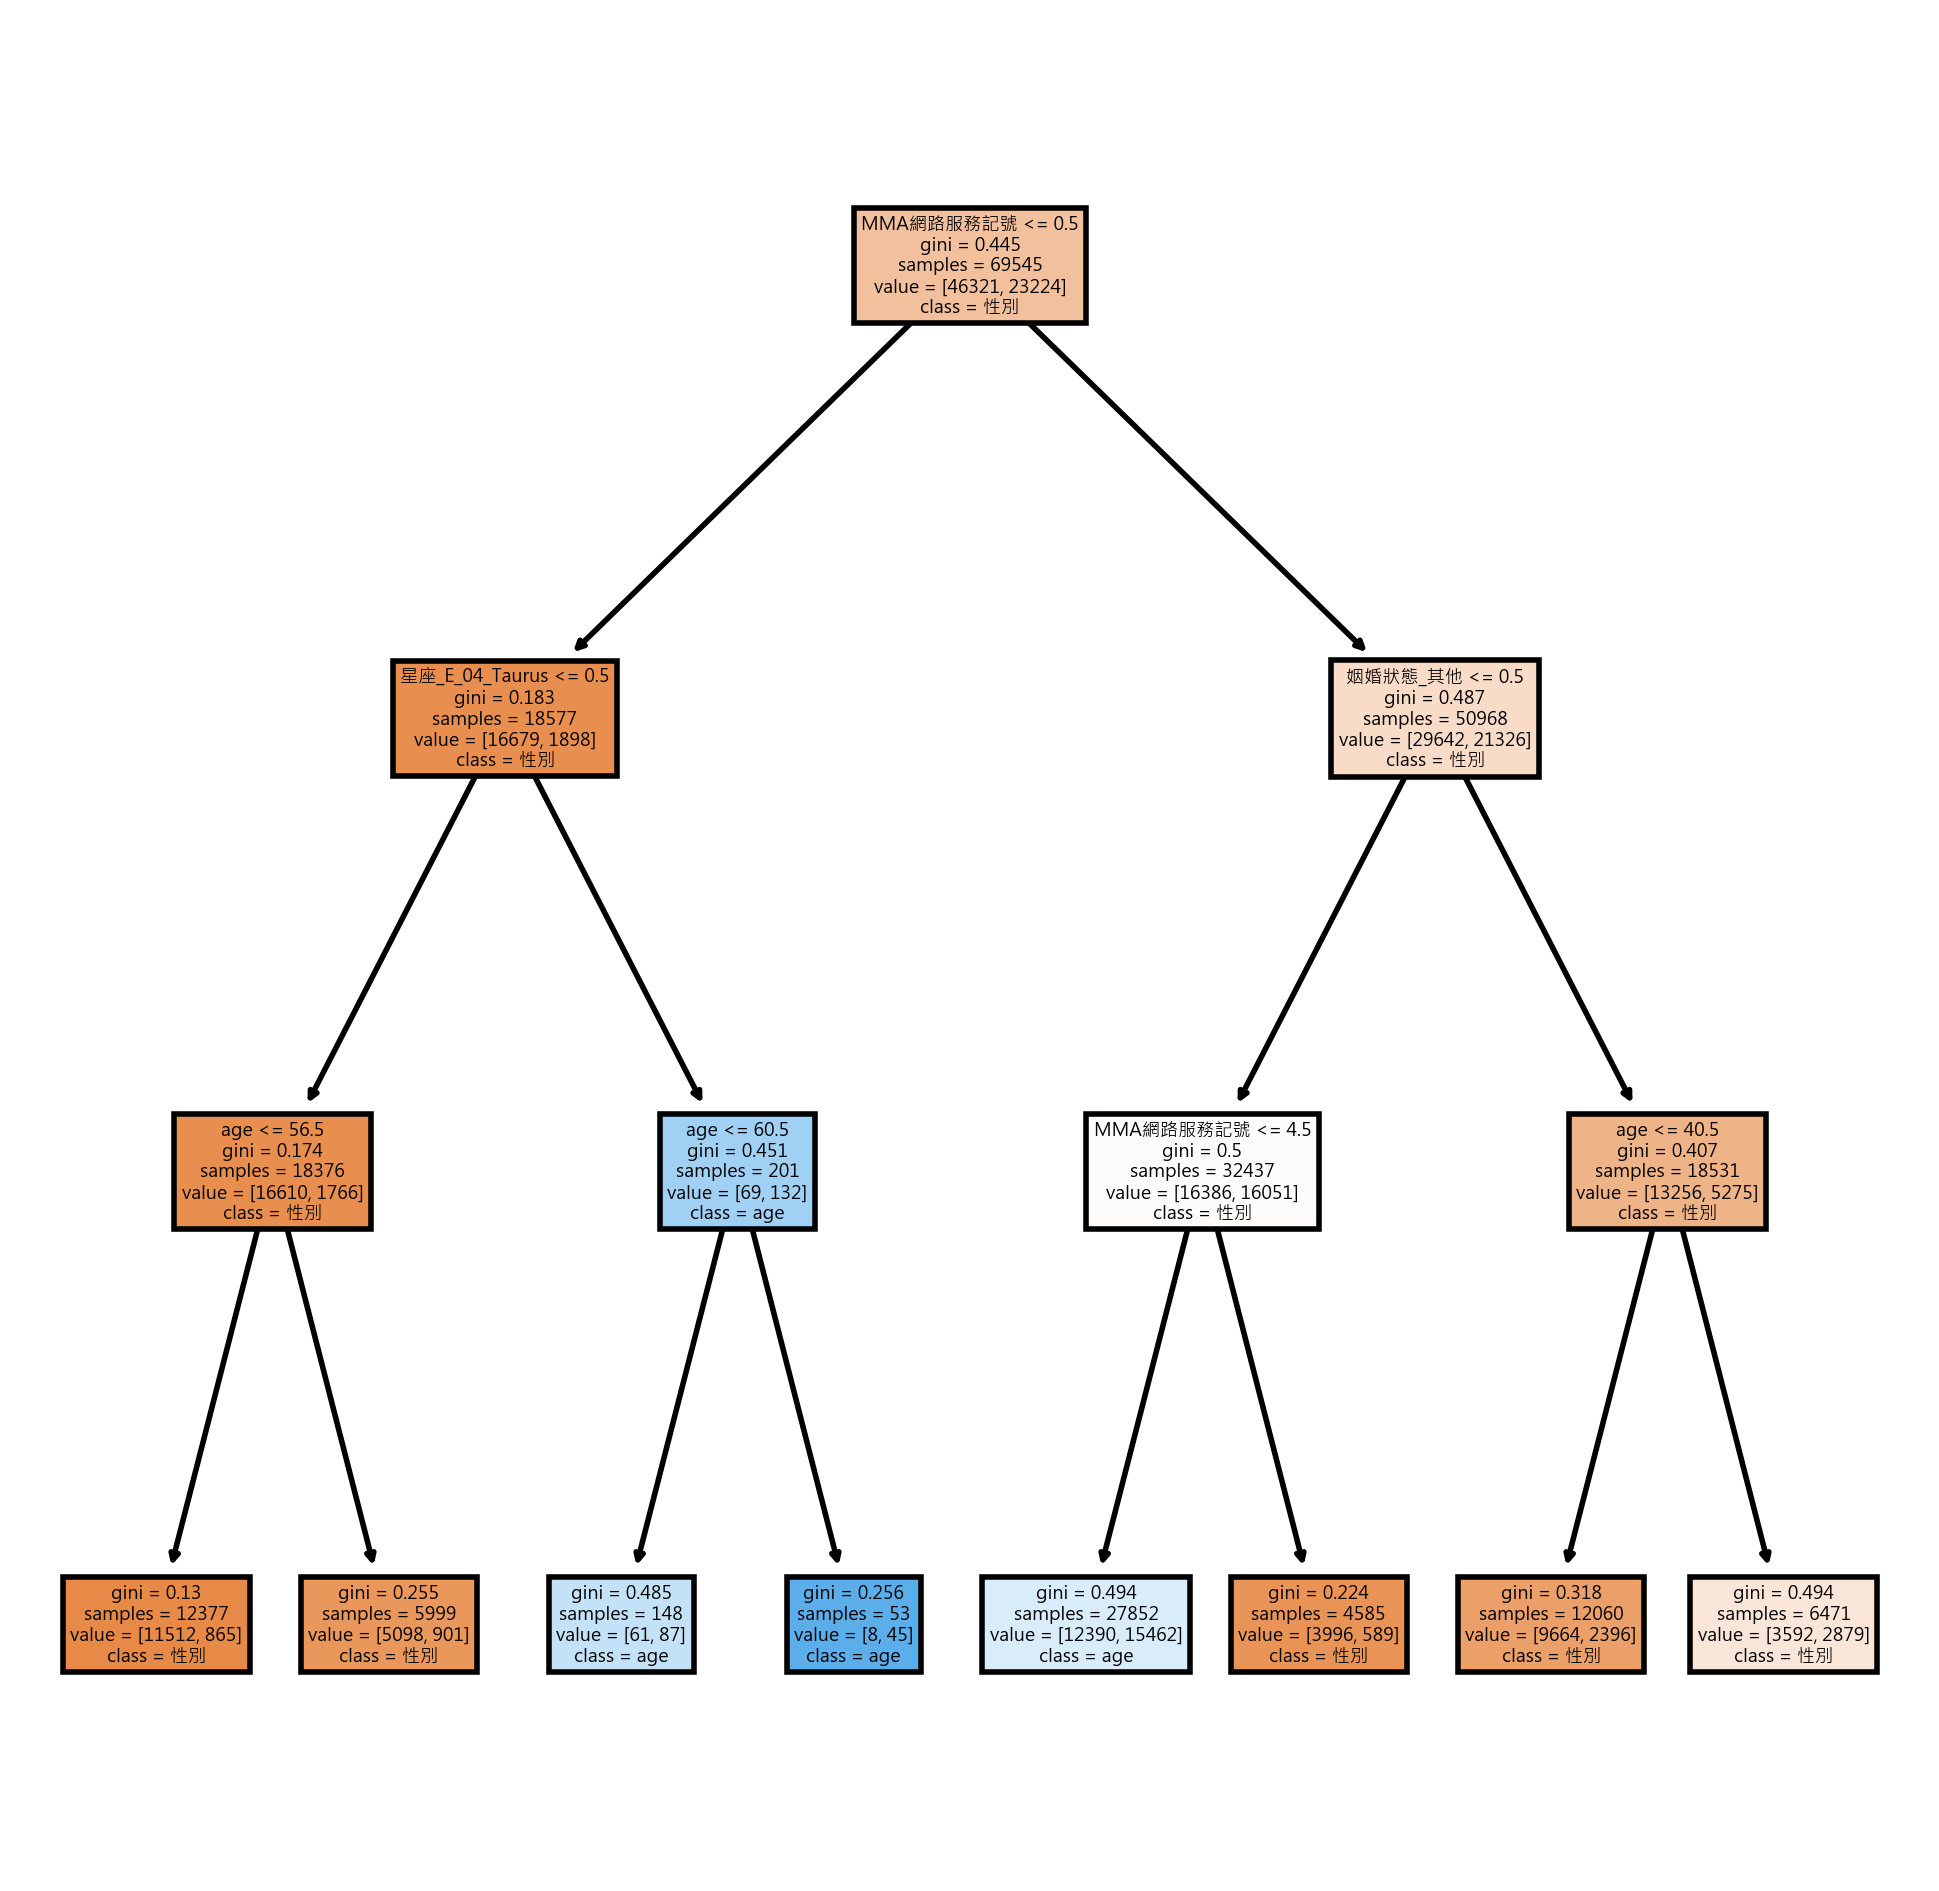

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=400)

tree.plot_tree(clf,
               class_names=cn,
              feature_names=ap_feature_columns,
               filled=True
              );

fig.savefig('imagename.png')

#dot_data = tree.export_graphviz(clf,
#                               out_file=None,
#                               filled=True,
#                                rounded=True,
#                                special_characters=True,
#                                feature_names=ap_feature_columns
#                               )

#graph = graphviz.Source(dot_data)
#graph

In [48]:
ap_feature.head(3)

#ap_feature["SEX"] = ap_feature["SEX"].replace("M","1")
#ap_feature["SEX"] = ap_feature["SEX"].replace("F","0")
#ap_feature["SEX"].value_counts()

,age,Salary,台幣總存款餘額,外幣總存款餘額_等值台幣,MMA網路服務記號,JCIC_無擔保貸款金額_千元,JCIC_無擔保貸款金額_千元_他行,JCIC_信用卡_最近分期餘額,JCIC_信用卡_最近分期餘額_他行,JCIC_信用卡_最近分期銀行數,JCIC_中期貸款餘額,JCIC_長期貸款餘額,JCIC_他行近一年年收入均值,SEX_F,SEX_M,年齡級距_a.~19,年齡級距_b.20~24,年齡級距_c.25~29,年齡級距_d.30~34,年齡級距_e.35~39,年齡級距_f.40~44,年齡級距_g.45~49,年齡級距_h.50~54,年齡級距_i.55~59,年齡級距_j.60~,行業別_分類_公營事業,行業別_分類_其他,行業別_分類_商業,行業別_分類_專業人士,行業別_分類_教育文化業,行業別_分類_服務業,行業別_分類_營造業,行業別_分類_製造業,行業別_分類_軍政機關,行業別_分類_農漁牧礦,行業別_分類_金融業,現居地_縣市_南投縣,現居地_縣市_台中市,現居地_縣市_台北市,現居地_縣市_台南市,現居地_縣市_台東縣,現居地_縣市_嘉義市,現居地_縣市_嘉義縣,現居地_縣市_基隆市,現居地_縣市_宜蘭縣,現居地_縣市_屏東縣,現居地_縣市_彰化縣,現居地_縣市_新北市,現居地_縣市_新竹市,現居地_縣市_新竹縣,現居地_縣市_桃園市,現居地_縣市_澎湖縣,現居地_縣市_花蓮縣,現居地_縣市_苗栗縣,現居地_縣市_連江縣,現居地_縣市_金門縣,現居地_縣市_雲林縣,現居地_縣市_高雄市,教育程度_1國中,教育程度_2高中,教育程度_3專科,教育程度_4大學,教育程度_5碩士,教育程度_6博士以上,教育程度_7其他,教育程度_博士,教育程度_大學,教育程度_專科,教育程度_碩士,教育程度_高中高職,姻婚狀態_其他,姻婚狀態_已婚,姻婚狀態_未婚,星座_E_00_Capricorn,星座_E_01_Aquarius,星座_E_02_Pisces,星座_E_03_Aries,星座_E_04_Taurus,星座_E_05_Gemini,星座_E_06_Cancer,星座_E_07_Leo,星座_E_08_Virgo,星座_E_09_Libra,星座_E_10_Scorpio,星座_E_11_Sagittarius,MMA網銀會員_N,MMA網銀會員_Y,曾登入行動銀行_N,曾登入行動銀行_Y
0,41.0,55.0,0.0,0.0,1,294,285,148.0,139.0,3.0,100.0,0.0,390.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,42.0,36.0,0.0,0.0,3,180,128,3.0,3.0,1.0,0.0,0.0,477.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,38.0,50.0,0.0,0.0,3,82,82,82.0,82.0,2.0,477.0,0.0,659.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


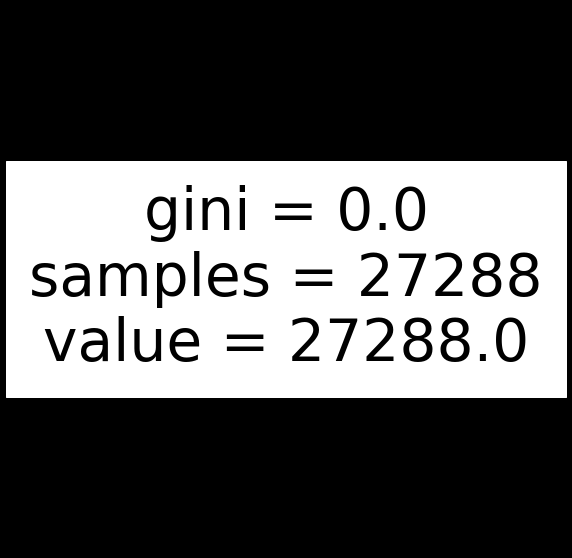

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')

#tree.plot_tree(clf) 
plot_tree(clf, rotate=True, ax=ax); 
plt.show()

In [32]:
ap_data_dummy.head(3)

,性別,age,戶籍_縣市,Salary,星座,台幣總存款餘額,外幣總存款餘額_等值台幣,MMA網路服務記號,JCIC_無擔保貸款金額_千元,JCIC_無擔保貸款金額_千元_他行,JCIC_信用卡_最近分期餘額,JCIC_信用卡_最近分期餘額_他行,JCIC_信用卡_最近分期銀行數,JCIC_中期貸款餘額,JCIC_長期貸款餘額,JCIC_他行近一年年收入均值,季投資理財AP_2020Q2,Target_Y,label,SEX_F,SEX_M,年齡級距_a.~19,年齡級距_b.20~24,年齡級距_c.25~29,年齡級距_d.30~34,年齡級距_e.35~39,年齡級距_f.40~44,年齡級距_g.45~49,年齡級距_h.50~54,年齡級距_i.55~59,年齡級距_j.60~,行業別_分類_公營事業,行業別_分類_其他,行業別_分類_商業,行業別_分類_專業人士,行業別_分類_教育文化業,行業別_分類_服務業,行業別_分類_營造業,行業別_分類_製造業,行業別_分類_軍政機關,行業別_分類_農漁牧礦,行業別_分類_金融業,現居地_縣市_南投縣,現居地_縣市_台中市,現居地_縣市_台北市,現居地_縣市_台南市,現居地_縣市_台東縣,現居地_縣市_嘉義市,現居地_縣市_嘉義縣,現居地_縣市_基隆市,現居地_縣市_宜蘭縣,現居地_縣市_屏東縣,現居地_縣市_彰化縣,現居地_縣市_新北市,現居地_縣市_新竹市,現居地_縣市_新竹縣,現居地_縣市_桃園市,現居地_縣市_澎湖縣,現居地_縣市_花蓮縣,現居地_縣市_苗栗縣,現居地_縣市_連江縣,現居地_縣市_金門縣,現居地_縣市_雲林縣,現居地_縣市_高雄市,教育程度_1國中,教育程度_2高中,教育程度_3專科,教育程度_4大學,教育程度_5碩士,教育程度_6博士以上,教育程度_7其他,教育程度_博士,教育程度_大學,教育程度_專科,教育程度_碩士,教育程度_高中高職,姻婚狀態_其他,姻婚狀態_已婚,姻婚狀態_未婚,星座_E_00_Capricorn,星座_E_01_Aquarius,星座_E_02_Pisces,星座_E_03_Aries,星座_E_04_Taurus,星座_E_05_Gemini,星座_E_06_Cancer,星座_E_07_Leo,星座_E_08_Virgo,星座_E_09_Libra,星座_E_10_Scorpio,星座_E_11_Sagittarius,MMA網銀會員_N,MMA網銀會員_Y,曾登入行動銀行_N,曾登入行動銀行_Y
0,女,41,新北市,55.0,處女座,0.0,0.0,1,294,285,148.0,139.0,3.0,100.0,0.0,390.0,13.040896,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,女,42,台中市,36.0,天蝎座,0.0,0.0,3,180,128,3.0,3.0,1.0,0.0,0.0,477.0,0.065629,1,Y,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,女,38,台北市,50.0,天秤座,0.0,0.0,3,82,82,82.0,82.0,2.0,477.0,0.0,659.0,2.802284,1,Y,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [33]:
#ap_data = data[["性別","age","行業別_分類","現居地_區域","戶籍_區域","Salary","姻婚狀態","星座","曾登入行動銀行","月投資理財AP_202006"]]




ap_label = ap_data_dummy["季投資理財AP_2020Q2"]
ap_feature = ap_data_dummy.drop(["性別","戶籍_縣市","星座","Target_Y","label","季投資理財AP_2020Q2"],axis=1)




In [36]:
ap_feature.head(3)

,age,Salary,台幣總存款餘額,外幣總存款餘額_等值台幣,MMA網路服務記號,JCIC_無擔保貸款金額_千元,JCIC_無擔保貸款金額_千元_他行,JCIC_信用卡_最近分期餘額,JCIC_信用卡_最近分期餘額_他行,JCIC_信用卡_最近分期銀行數,JCIC_中期貸款餘額,JCIC_長期貸款餘額,JCIC_他行近一年年收入均值,SEX_F,SEX_M,年齡級距_a.~19,年齡級距_b.20~24,年齡級距_c.25~29,年齡級距_d.30~34,年齡級距_e.35~39,年齡級距_f.40~44,年齡級距_g.45~49,年齡級距_h.50~54,年齡級距_i.55~59,年齡級距_j.60~,行業別_分類_公營事業,行業別_分類_其他,行業別_分類_商業,行業別_分類_專業人士,行業別_分類_教育文化業,行業別_分類_服務業,行業別_分類_營造業,行業別_分類_製造業,行業別_分類_軍政機關,行業別_分類_農漁牧礦,行業別_分類_金融業,現居地_縣市_南投縣,現居地_縣市_台中市,現居地_縣市_台北市,現居地_縣市_台南市,現居地_縣市_台東縣,現居地_縣市_嘉義市,現居地_縣市_嘉義縣,現居地_縣市_基隆市,現居地_縣市_宜蘭縣,現居地_縣市_屏東縣,現居地_縣市_彰化縣,現居地_縣市_新北市,現居地_縣市_新竹市,現居地_縣市_新竹縣,現居地_縣市_桃園市,現居地_縣市_澎湖縣,現居地_縣市_花蓮縣,現居地_縣市_苗栗縣,現居地_縣市_連江縣,現居地_縣市_金門縣,現居地_縣市_雲林縣,現居地_縣市_高雄市,教育程度_1國中,教育程度_2高中,教育程度_3專科,教育程度_4大學,教育程度_5碩士,教育程度_6博士以上,教育程度_7其他,教育程度_博士,教育程度_大學,教育程度_專科,教育程度_碩士,教育程度_高中高職,姻婚狀態_其他,姻婚狀態_已婚,姻婚狀態_未婚,星座_E_00_Capricorn,星座_E_01_Aquarius,星座_E_02_Pisces,星座_E_03_Aries,星座_E_04_Taurus,星座_E_05_Gemini,星座_E_06_Cancer,星座_E_07_Leo,星座_E_08_Virgo,星座_E_09_Libra,星座_E_10_Scorpio,星座_E_11_Sagittarius,MMA網銀會員_N,MMA網銀會員_Y,曾登入行動銀行_N,曾登入行動銀行_Y
0,41,55.0,0.0,0.0,1,294,285,148.0,139.0,3.0,100.0,0.0,390.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,42,36.0,0.0,0.0,3,180,128,3.0,3.0,1.0,0.0,0.0,477.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,38,50.0,0.0,0.0,3,82,82,82.0,82.0,2.0,477.0,0.0,659.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [34]:
ap_label.head(5)

0     13.040896
1      0.065629
3      2.802284
4    179.331062
5    526.550692
Name: 季投資理財AP_2020Q2, dtype: float64

In [ ]:
ap_feature.head(5)

In [ ]:
#data["行業別"].value_counts().to_frame()
#ap_data_dn["行業別_分類"].value_counts().to_frame()
ap_data["曾登入行動銀行"].value_counts().to_frame()
data["員工記號"].value_counts().to_frame()

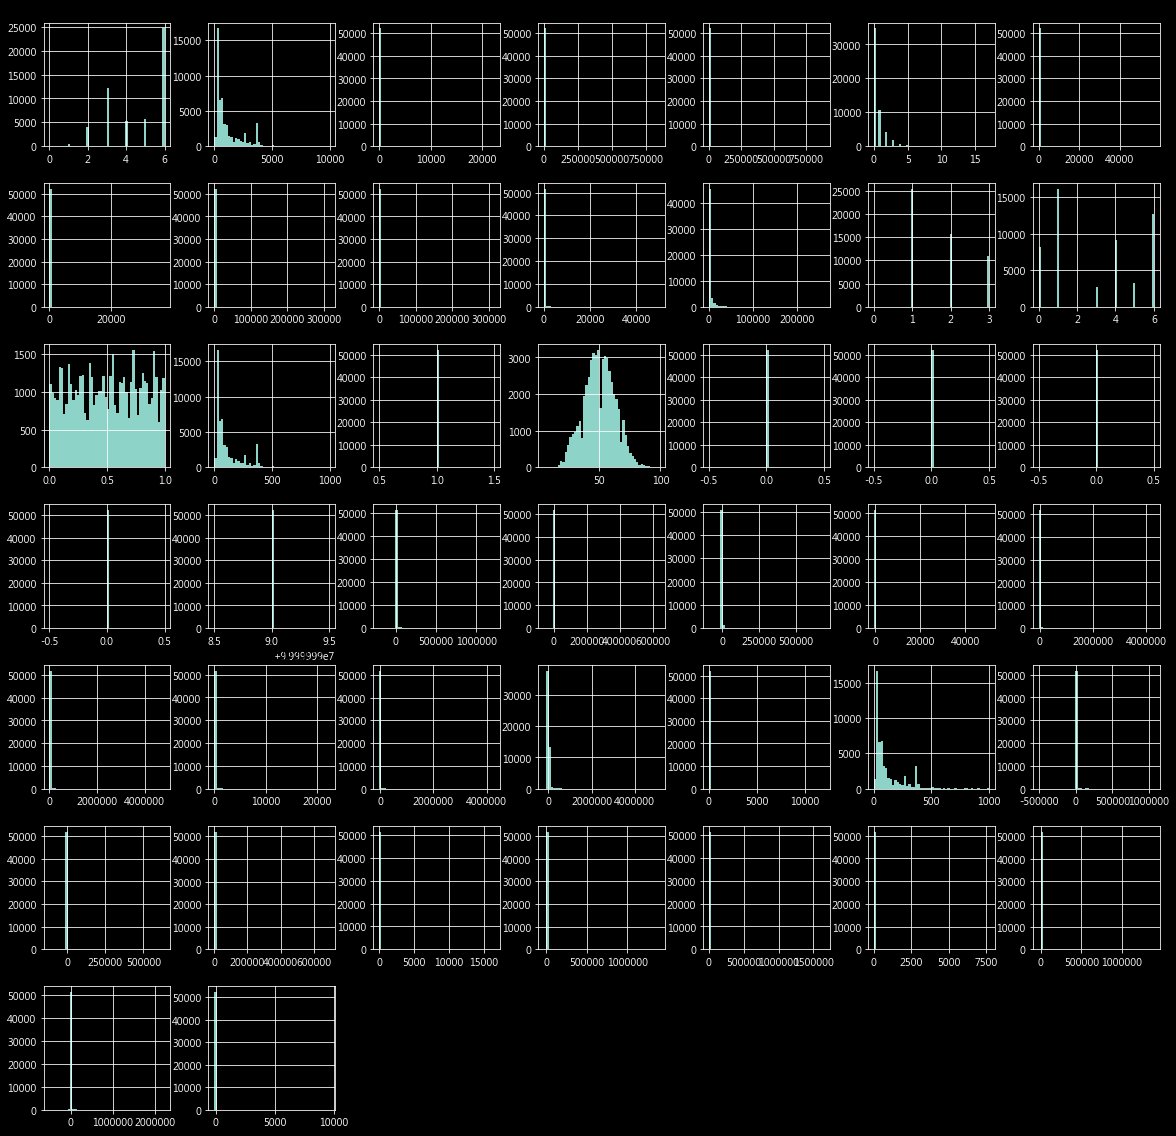

In [37]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

data.hist(bins=50, figsize=(20,20))
plt.show()

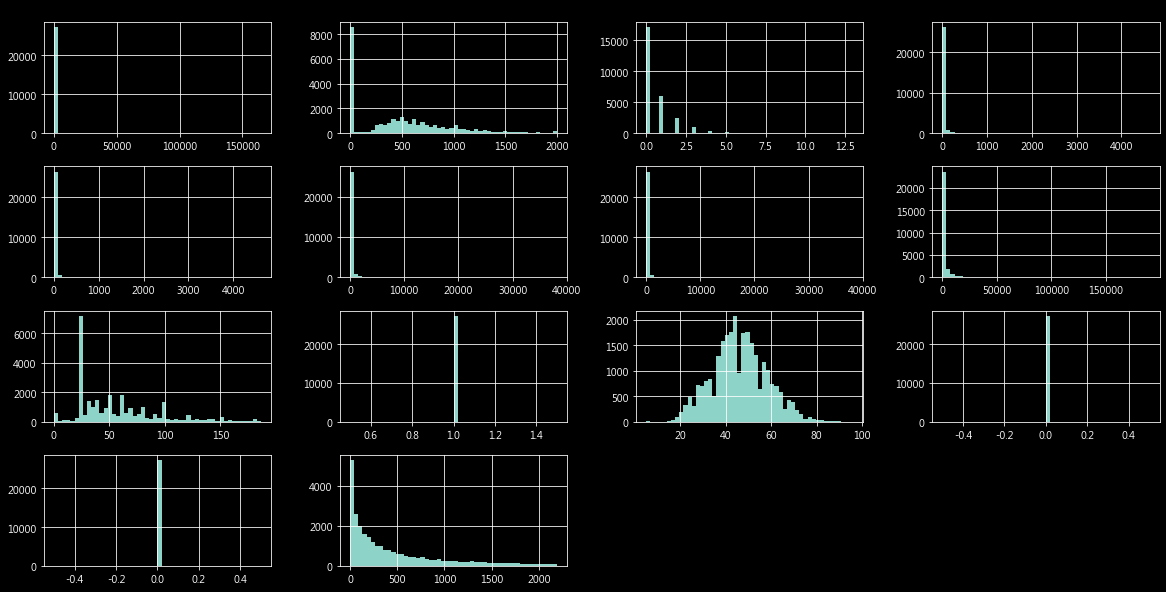

In [38]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

ap_data.hist(bins=50, figsize=(20,10))
plt.show()


In [39]:
a = ap_data.shape 
print("{0}".format(a))

a = ap_label.shape 
print("{0}".format(a))

(27288, 28)
(27288,)


In [42]:
ap_feature.info()
#train_ap_data.info()
#test_ap_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27288 entries, 0 to 52188
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       27288 non-null  int64  
 1   Salary                    27288 non-null  float64
 2   台幣總存款餘額                   27288 non-null  float64
 3   外幣總存款餘額_等值台幣              27288 non-null  float64
 4   MMA網路服務記號                 27288 non-null  object 
 5   JCIC_無擔保貸款金額_千元           27288 non-null  int64  
 6   JCIC_無擔保貸款金額_千元_他行        27288 non-null  int64  
 7   JCIC_信用卡_最近分期餘額           27288 non-null  float64
 8   JCIC_信用卡_最近分期餘額_他行        27288 non-null  float64
 9   JCIC_信用卡_最近分期銀行數          27288 non-null  float64
 10  JCIC_中期貸款餘額               27288 non-null  float64
 11  JCIC_長期貸款餘額               27288 non-null  float64
 12  JCIC_他行近一年年收入均值           27288 non-null  float64
 13  SEX_F                     27288 non-null  uint8  
 14  SEX_M 

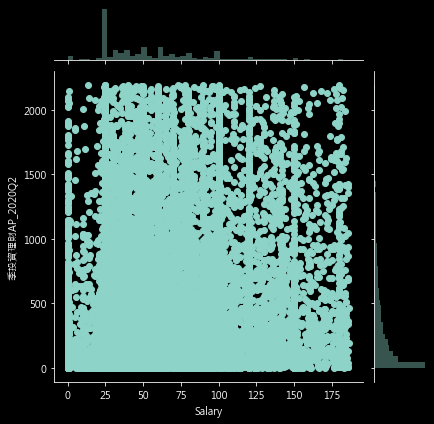

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

sns.jointplot(x='Salary',y ='季投資理財AP_2020Q2', data = ap_data)

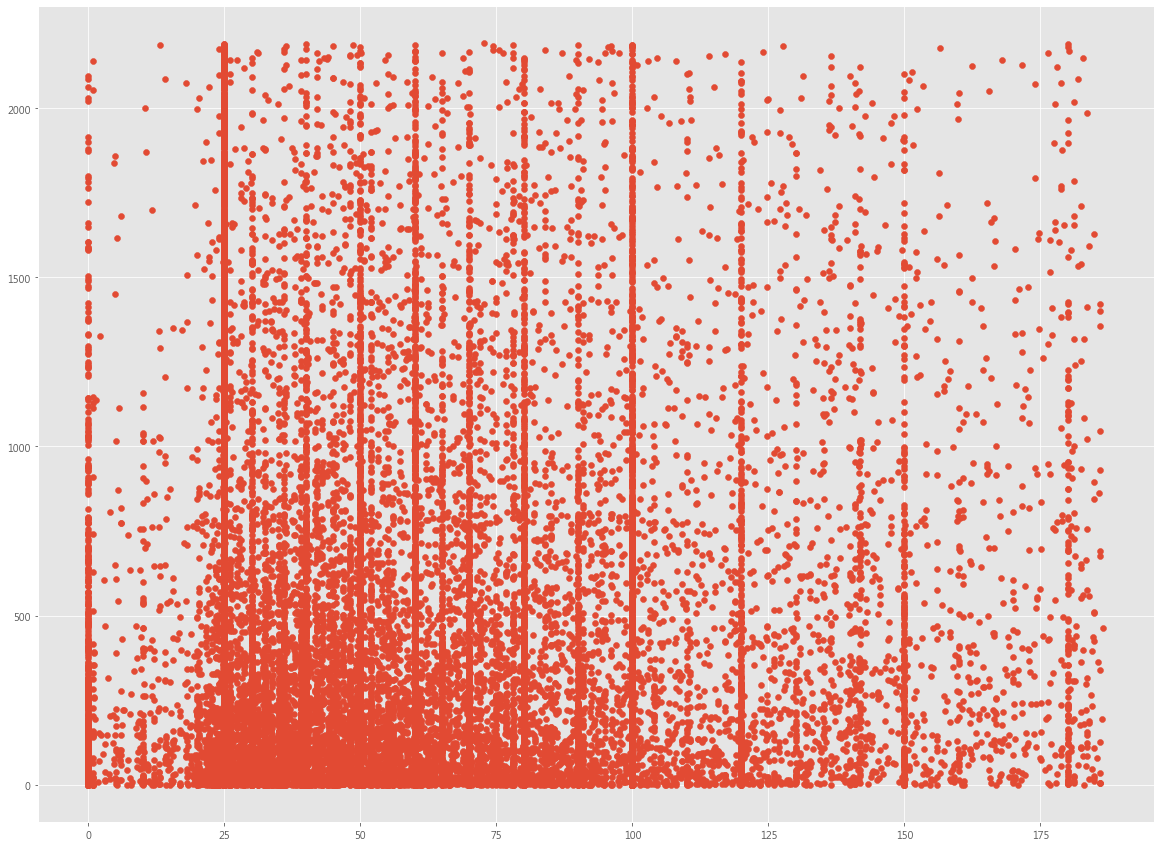

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

plt.rcParams.update(
    {'font.sans-serif': 'Microsoft JhengHei', 'axes.unicode_minus': False})
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 15))


plt.scatter(y=ap_data["季投資理財AP_2020Q2"],x=ap_data["Salary"])

plt.show()

In [ ]:
ap_data.head(5)

In [ ]:
ap_feature.head(5)

In [ ]:
ap_label.head(5)

In [44]:
from sklearn.model_selection import train_test_split

train_ap_data, test_ap_data, train_ap_label, test_ap_label = train_test_split(ap_feature, ap_label)

In [48]:
ap_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27288 entries, 0 to 52188
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       27288 non-null  int64  
 1   Salary                    27288 non-null  float64
 2   台幣總存款餘額                   27288 non-null  float64
 3   外幣總存款餘額_等值台幣              27288 non-null  float64
 4   MMA網路服務記號                 27288 non-null  object 
 5   JCIC_無擔保貸款金額_千元           27288 non-null  int64  
 6   JCIC_無擔保貸款金額_千元_他行        27288 non-null  int64  
 7   JCIC_信用卡_最近分期餘額           27288 non-null  float64
 8   JCIC_信用卡_最近分期餘額_他行        27288 non-null  float64
 9   JCIC_信用卡_最近分期銀行數          27288 non-null  float64
 10  JCIC_中期貸款餘額               27288 non-null  float64
 11  JCIC_長期貸款餘額               27288 non-null  float64
 12  JCIC_他行近一年年收入均值           27288 non-null  float64
 13  SEX_F                     27288 non-null  uint8  
 14  SEX_M 

In [ ]:
ap_feature = ap_data_dummy.drop(["性別","戶籍_縣市","星座","Target_Y","label","季投資理財AP_2020Q2"],axis=1)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
reg = linear_model.LinearRegression()

In [46]:
reg.fit(train_ap_data,train_ap_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg.score(train_ap_data,train_ap_label)

0.05555884336760153

In [ ]:
reg.score(test_ap_data,test_ap_label)

In [ ]:
a = reg.intercept_
print("intercept: {0}".format(a))
      
a = reg.coef_
print("coef: {0}".format(a))    

a = train_ap_data.columns
print("x_columns: {0}".format(a))    

In [49]:
import xgboost as xgb

from xgboost import XGBClassifier
from xgboost import plot_importance


In [57]:
train_ap_data["MMA網路服務記號"] = train_ap_data["MMA網路服務記號"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
train_ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20466 entries, 19799 to 25911
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       20466 non-null  int64  
 1   Salary                    20466 non-null  float64
 2   台幣總存款餘額                   20466 non-null  float64
 3   外幣總存款餘額_等值台幣              20466 non-null  float64
 4   MMA網路服務記號                 20466 non-null  int32  
 5   JCIC_無擔保貸款金額_千元           20466 non-null  int64  
 6   JCIC_無擔保貸款金額_千元_他行        20466 non-null  int64  
 7   JCIC_信用卡_最近分期餘額           20466 non-null  float64
 8   JCIC_信用卡_最近分期餘額_他行        20466 non-null  float64
 9   JCIC_信用卡_最近分期銀行數          20466 non-null  float64
 10  JCIC_中期貸款餘額               20466 non-null  float64
 11  JCIC_長期貸款餘額               20466 non-null  float64
 12  JCIC_他行近一年年收入均值           20466 non-null  float64
 13  SEX_F                     20466 non-null  uint8  
 14  SE

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(train_ap_data,train_ap_label)

In [ ]:
xgbc.score(train_ap_data,train_ap_label)